Create truncated Fourier series
===========================

In [1]:
from methods.rnd_func_utils import create_coefficients, load_coefficients
from methods.rnd_func_utils import (
    get_xcorrelation,
    get_distributions,
    print_distribution,
    extrem_functions,
)
from methods.func_utils import test_function
from methods.plot_utils import plot_raw_function, plot_xcorr_example

# Create and save coefficients

The method which creates normalized Fourier coefficients for all degrees smaller and equal to `max_degree`.\
The variable `rnd_functions` determines how many functions are created for each degree.\
If a file with the name `filename` in folder `save_path` already exits, the file will be loaded and not changed.

In [2]:
save_path = "./functions"
filename = "c_50_test"

rnd_functions = 100
max_degree = 6

In [3]:
all_coeff, x_test, x_train = create_coefficients(
    max_degree, rnd_functions, filename, save_path
)

# Load coefficients

In [4]:
save_path = "./functions"
filename = "c_100_a"
# filename = "c_100_alt"
degree = 12

In [5]:
all_coeff, x_test, x_train = load_coefficients(degree, save_path, filename)

# Plot function

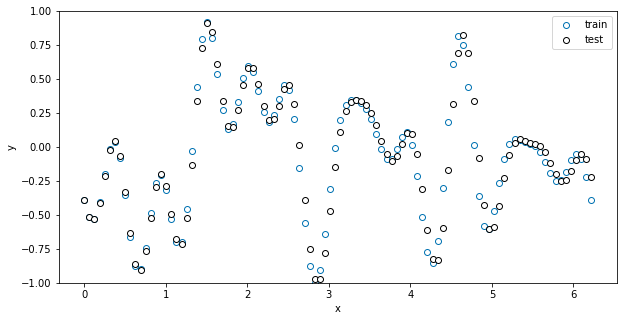

In [6]:
test_number = 3
y_train, y_test = test_function(
    coeffs=all_coeff[test_number], x_train=x_train, x_test=x_test, scaling=1
)
plot_raw_function(x_train, y_train, x_test, y_test)

# Check cross-correlation of coefficient set

In [7]:
corr_array, norm_corr_array = get_xcorrelation(all_coeff, x_train, x_test, filename)

No recalculation of cross-correlation for set c_100_a.
Rename file xcorr_c_100_a in folder ./functions to allow recalculation.
Loaded previously calculated data.


# Display of cross-correlation values

In [8]:
print("---------------------------------------")
data_range, distribution, data = get_distributions(norm_corr_array)
print("---------------------------------------")
print_distribution(data_range, distribution)

---------------------------------------
normalized min :  0.30691560097006726
normalized mean:  0.5024716348305396
normalized max :  0.7981092188671757
---------------------------------------
total values:  4950
[1,0.9]: 0
(0.9,0.8]: 0
(0.8,0.7]: 38
(0.7,0.6]: 383
(0.6,0.5]: 1925
(0.5,0.4]: 2350
(0.4,0.3]: 254
(0.3,0.2]: 0
(0.2,0.1]: 0
(0.1,-0.0]: 0
(-0.0,-0.1]: 0
(-0.1,-0.2]: 0
(-0.2,-0.3]: 0
(-0.3,-0.4]: 0
(-0.4,-0.5]: 0
(-0.5,-0.6]: 0
(-0.6,-0.7]: 0
(-0.7,-0.8]: 0
(-0.8,-0.9]: 0
(-0.9,-1.0]: 0


# Plot functions with extreme cross-correlation values

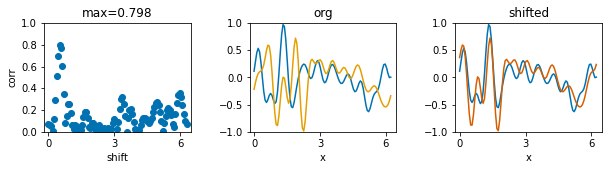

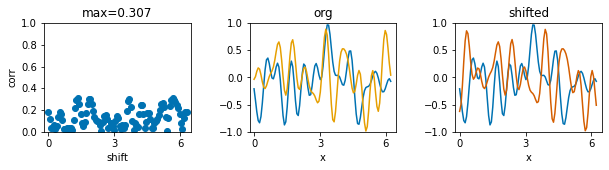

In [9]:
best_functions, worst_functions = extrem_functions(norm_corr_array, data)
plot_xcorr_example(
    worst_functions, norm_corr_array, x_train, x_test, all_coeff, "xcorr_worst_1"
)
plot_xcorr_example(
    best_functions, norm_corr_array, x_train, x_test, all_coeff, "xcorr_best_1"
)